Goal:
The goal is to predict the average price of avocado which is continuous. And another algorithm that will classify the region of the avocado.


In [1]:
#import all libraries i may use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
#from sklearn.externals import joblib
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import altair as alt
#alt.renderers.enable("notebook")
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.datasets import make_blobs
from sklearn.linear_model import  LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split,KFold, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold, GridSearchCV
from sklearn import feature_selection as fs
from sklearn.preprocessing import PowerTransformer
from sklearn.naive_bayes import GaussianNB
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor  
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')
#from keras.models import Sequential,model_from_json
#from keras.layers import Dense
#from keras.optimizers import RMSprop
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import RandomizedLasso,LassoLarsCV
from sklearn.exceptions import ConvergenceWarning 
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix
import sklearn.datasets 

%matplotlib inline

from scipy.stats import skew
from sklearn import preprocessing
import time
import pickle


from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error, median_absolute_error
import sklearn.metrics
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

In [2]:
#fetching data and visualize it
df = pd.read_csv("avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
#Unamed 0’ : The Feature "Unnamed:0" is just a representation of the indexes, so we will not use it neither for our analysis now for our machine learning algorithms.
df.drop(df.columns[[0]],inplace=True, axis = 1)

In [4]:
df.dtypes #we can check the Feature Unnamed:0 is removed


Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [5]:
#checking rows and number of columns of the dataset.
df.shape

(18249, 13)

In [6]:
#now lets print the info() methode to get an a general idea about our data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


So, we hve all columnes without null values, good!
Regarding data type, we have object, float and int64 data type. ok.

In [7]:
#checking the value counts of each region
df.region.value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

Region data is very balanced.

In [8]:
#checking the value counts of each type
df.type.value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

Type of avocado data is also very balanced.

In [9]:
#checking the value counts of each year
df.year.value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

Year 2017 has the highest average price 

In [10]:
#just checking in case, the value_counts of each average price
df.AveragePrice.value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64

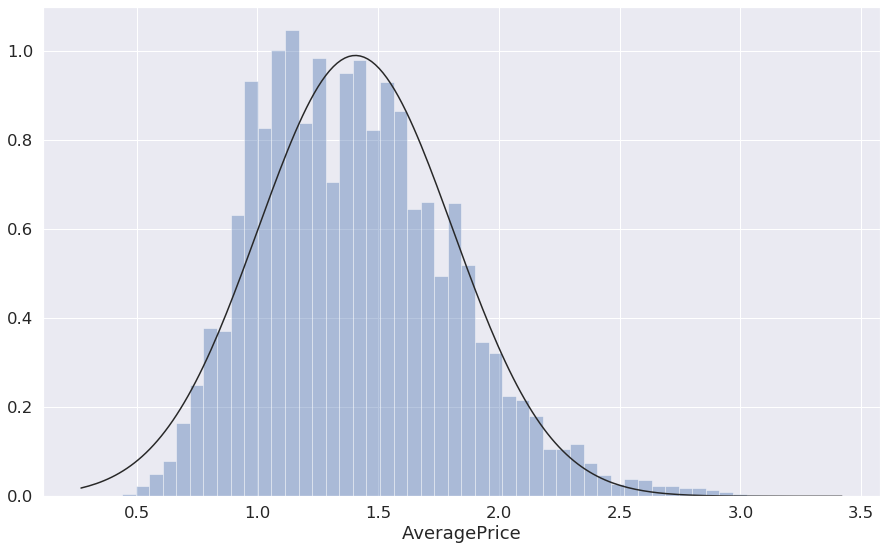

In [11]:
#Distribution of the price feature:
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df.AveragePrice, kde=False, fit=norm)

As we can notice, the price column has a bit of skewness!  Skew to the right!

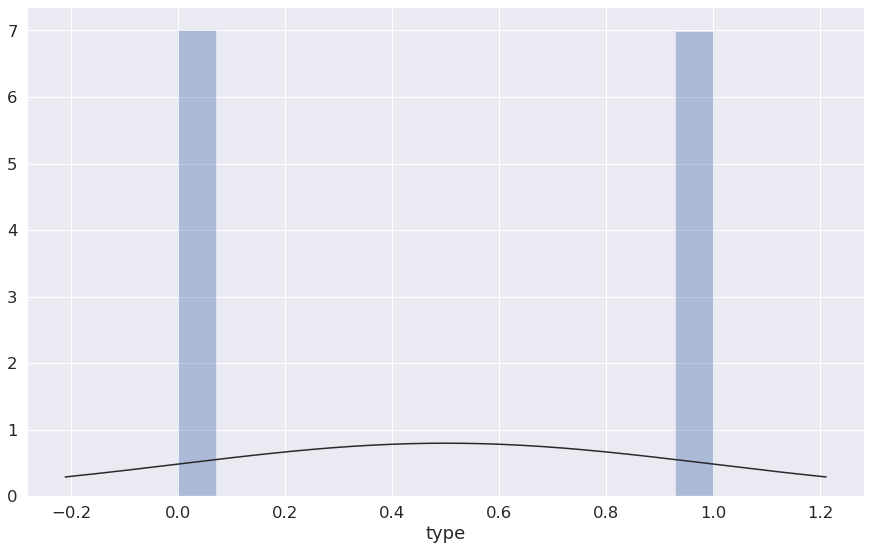

In [12]:
#checking the organic type of avacado
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df['type'] == 'organic', kde=False, fit=norm)

Organice and Conventional type of avocado, as we see in the above displot, we have balanced data in there! So, good!

In [13]:
organic=df['type'] == 'organic'
len(organic)

18249

In [14]:
conv=df['type'] == 'conventional'
len(conv)

18249

We can see both type of avocado are equally balanced in our dataframe.

In [15]:
df.describe()


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


We can notice we have outliers in XLargeBags since the max is much higher than the 75% quantil of the XLargeBags column.

We can also notice in few columns we have mean close to the median value of the corresponding column such like AveragePrice, 4225 and year.

We can also see that the count of all columns is the same, which means no missing values as we discussed previously.

If we check the difference between the 75% and max value, we expect some outliers in some of the column.

In [16]:
#just to double check, checking null values
df.isnull().sum() #no missing values in dataset, that's great!


Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

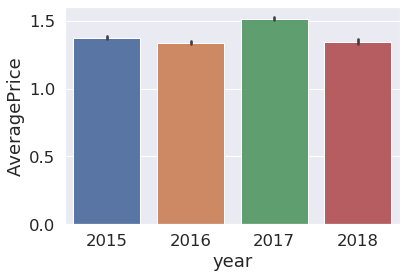

In [17]:
#checking max average price by year
sns.barplot(x = "year" , y = "AveragePrice" ,data=df )

As we said previously that 2017 year when max average price is obtained

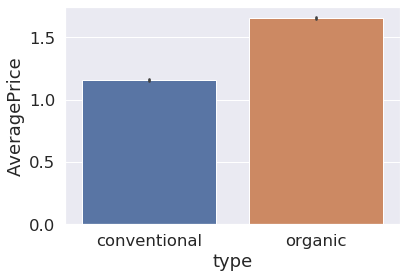

In [18]:
#plotting average price by type of avocado
sns.barplot(x = "type" , y = "AveragePrice" ,data=df )

As we expect, organic average price is much higher than the conventional avocado's average price.

In [19]:
# just to double check the previous graph, checking the mean average price of each type of avocado
df.groupby('type')['AveragePrice'].mean() 

type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64

As we were expecting, the mean average of organic avocado is much higher than the conventional avocado.

In [20]:
#checking the average volume of avacado per year
df.groupby('year')['Total Volume'].mean()

year
2015    7.810274e+05
2016    8.584206e+05
2017    8.623393e+05
2018    1.066928e+06
Name: Total Volume, dtype: float64

Year 2017 has the highest total volume mean of avocado!

In [21]:
#total sales by year 
df.groupby('year')['Total Volume'].count()

year
2015    5615
2016    5616
2017    5722
2018    1296
Name: Total Volume, dtype: int64

Year 2017 has the highest total volume of avocado  in absolute numbers!

In [22]:
#finding how much type of avacado is sell in different year
df.groupby('year')['type'].value_counts() 

#as we see below, there is no such highlited difference in the quatity of different type of avocado each year


year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

In [23]:
#checking the mean average price at each year of organic avacado

organic = df[df['type'] == 'organic']
organic.groupby('year')['AveragePrice'].mean()


year
2015    1.673324
2016    1.571684
2017    1.735521
2018    1.567176
Name: AveragePrice, dtype: float64

Average Price distribution shows that for most cases price of avocado is between 1.5, 1.74.

Let's look at average price throughout the date:

Text(0.5, 1.0, 'Average Price')

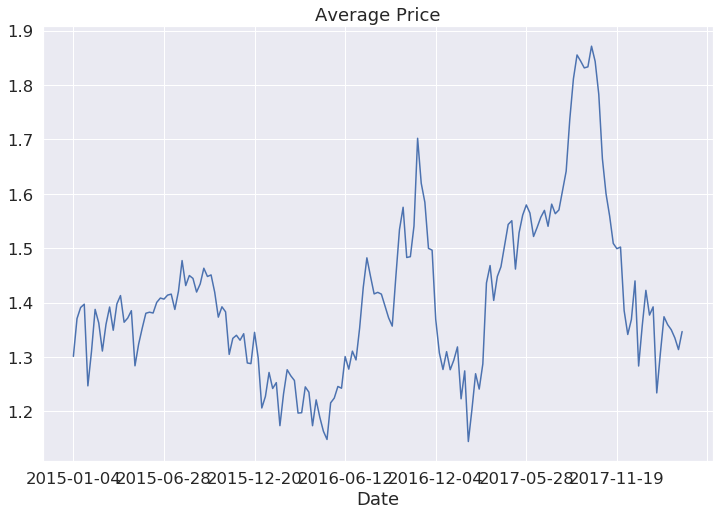

In [24]:
 #plotting the Avocado's Average Price throughout the Date 
byDate=df.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')

In [25]:
#Extract the Month from DOB into separate column in order to analize the data by month
df['Month'] = pd.DatetimeIndex(df['Date']).month
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


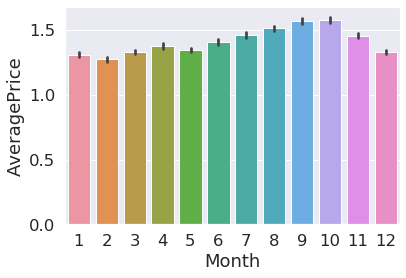

In [26]:
#checking average price by month 
sns.barplot(x = "Month" , y = "AveragePrice" ,data=df )

sept and october is the month where max no og average price is there

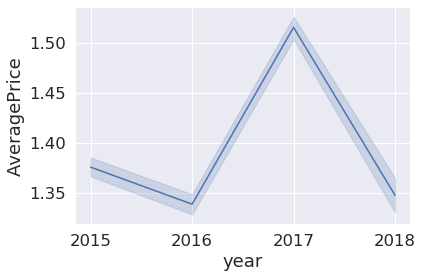

In [27]:
#plotting the average price over the years
sns.lineplot(x = 'year', y = 'AveragePrice', data=df)

We see a the minimum peak for year 2018 (it has lowest average price even if we cant see it fully in the plot aove) and then the maximum peak for year 2017.

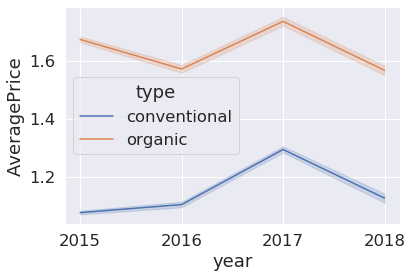

In [28]:
#plotting the average price for different type of avocado over the years
plt.figure(figsize=(6,4))
sns.lineplot(x="year", y="AveragePrice", hue='type', data=df)
plt.show()

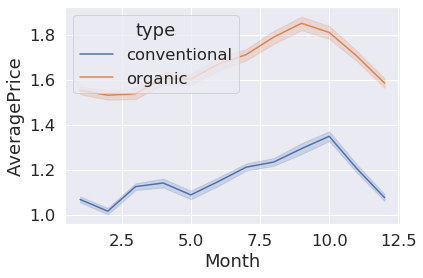

In [29]:
#plotting Average price over the months by separating Conventional and Organic Types:

plt.figure(figsize=(6,4))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.show() #Looks like there was a hike between months 8 – 10 for both Conventional and Organic type of Avocados prices


Above graph shows that there is positive variation between month 5 and 10 and that there is hike between month 8-10 of both type of avacado

Text(0.5, 1.0, 'ration of Price and Region')

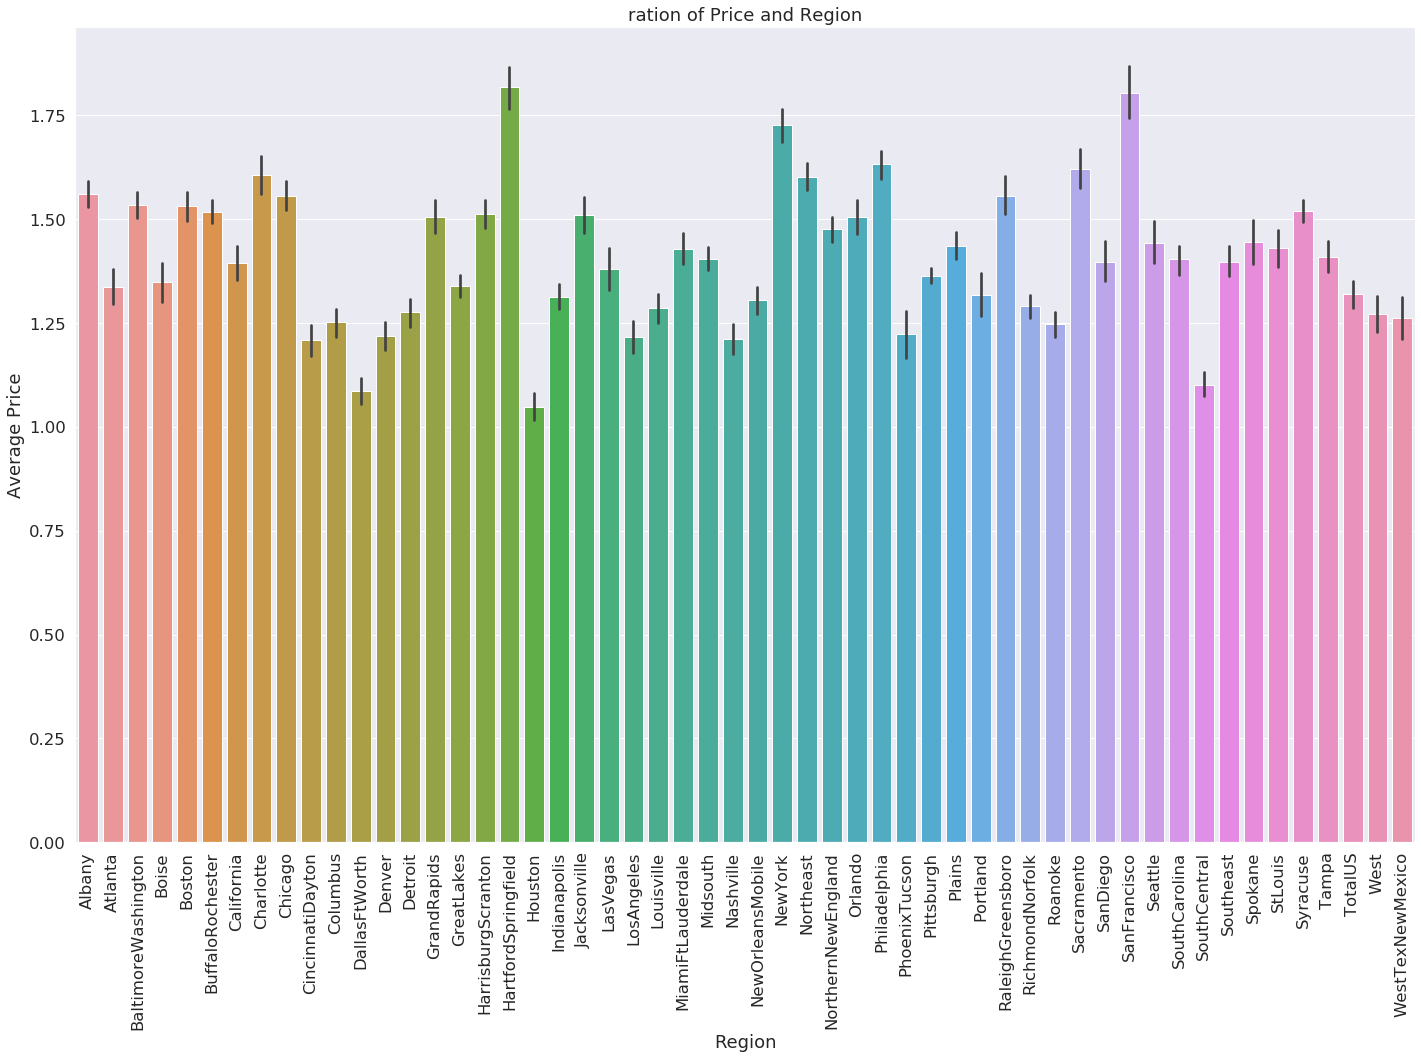

In [30]:
#Now lets plot Average price distribution based on region
plt.figure(figsize=(24,15))
sns.barplot(x='region',y='AveragePrice',data=df)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('ration of Price and Region')

Looks like the region HartfordSpringfield, SanFrancisco and NewYork are the regions with highest price ratio as compared to other regions.



Text(0.5, 1.0, 'Average of Total Volume According to Region')

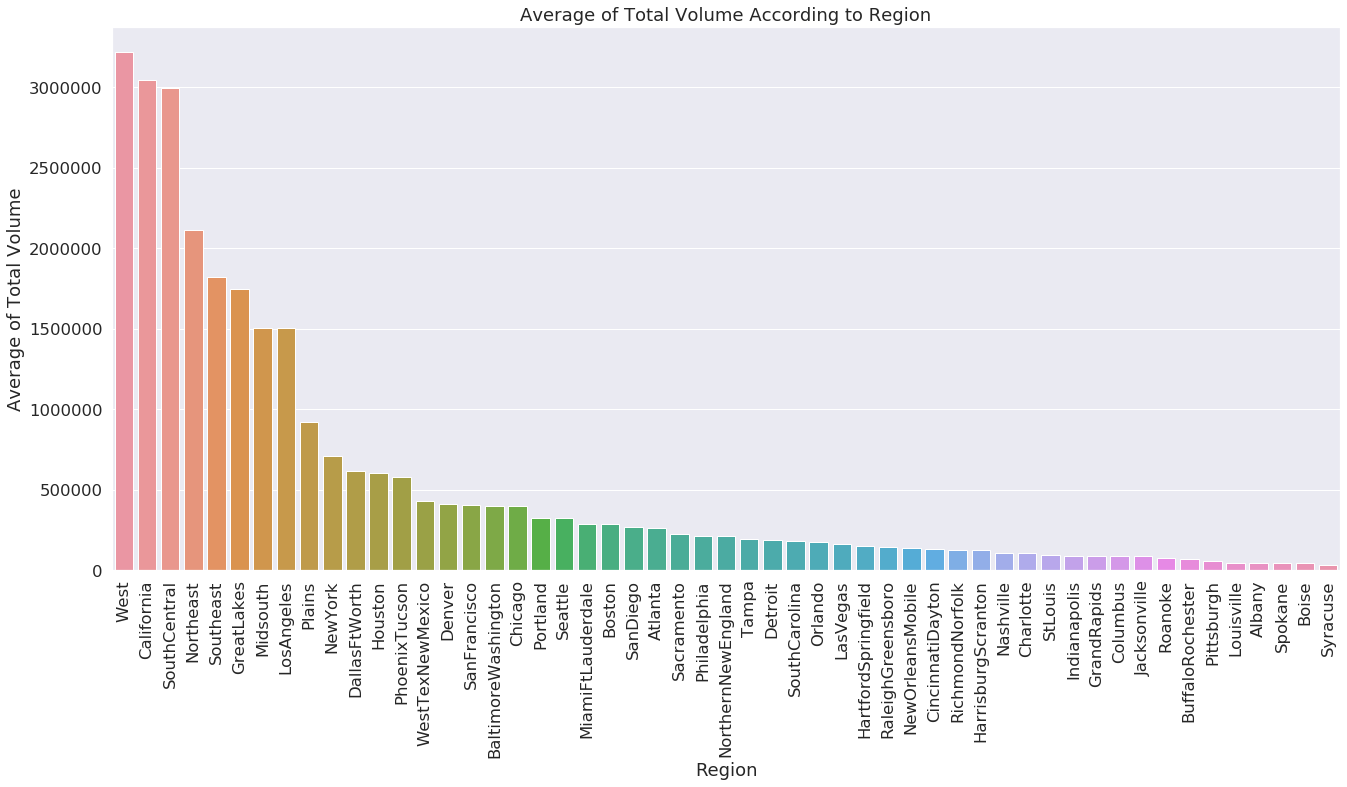

In [31]:
#checking for TOP 5 regions where Average consumption of avocado is very high:

filter1=df.region!='TotalUS'
df1=df[filter1]

region_list=list(df1.region.unique())
average_total_volume=[]

for i in region_list:
    x=df1[df1.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
df3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')

If we analize the average of total volume accoring to Region, then the Region with highest consuption of avocado are West, California, SouthCentral, Northeast, Southeast and GreatLakes.

Text(0.5, 1.0, 'Average Price')

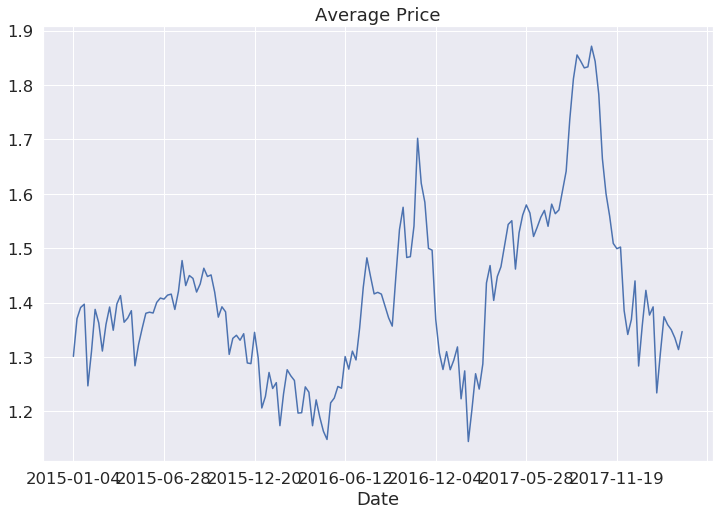

In [32]:
#Now we will print a plot where we can see the Average Price by date:
byDate=df.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')

As we have seen earlier, the year 2017 has the highest average rate of avocado. 

And now, let's check the highest average rate by Month:

Text(0.5, 1.0, 'Average_Price')

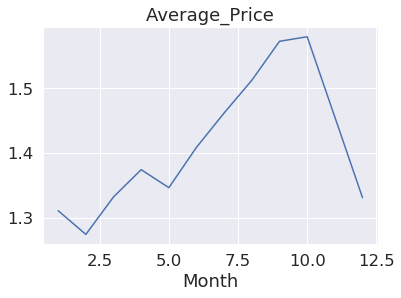

In [33]:
month=df.groupby('Month').mean()
plt.figure(figsize=(6,4))
month['AveragePrice'].plot()
plt.title('Average_Price')

As we mentioned earlier, We can see and expect that between month august to october the price of avacado is much higher compared to others months.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a6fd8f310>,
      dtype=object)

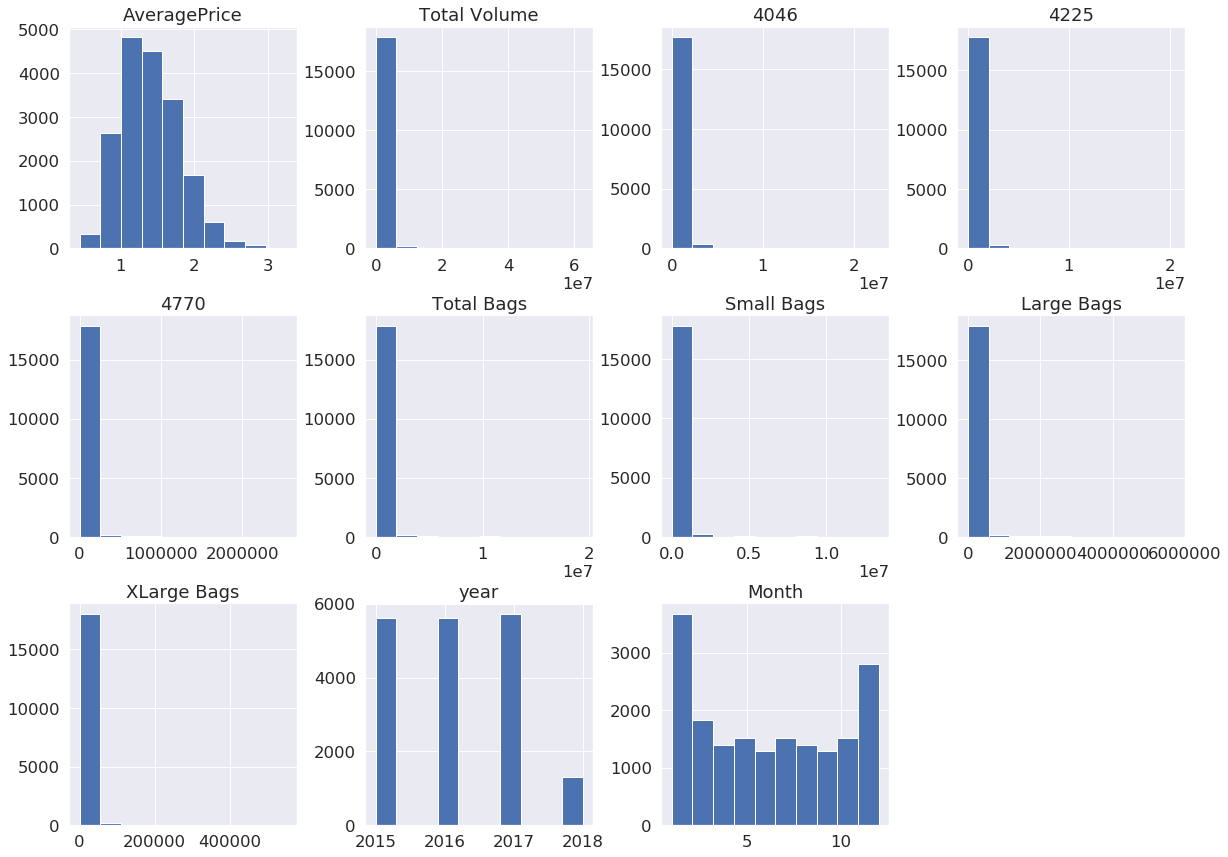

In [34]:
#plotting histogram for univariate analysis and checking the Normal Distribution
df.hist(figsize=(20,20), grid = True, layout = (4,4))

After plotting the histograms, we can see that almost all the columns are skewed except the avergae price that is pretty normalized.

In [35]:
#Making the categorical data into numercial in order to normalize and check the correlations too.
column = ['type','region']
le = LabelEncoder()
for i in column:
    df[i] = le.fit_transform(df[i])

print(df.dtypes)

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int64
year              int64
region            int64
Month             int64
dtype: object


In [36]:
df['type']

0        0
1        0
2        0
3        0
4        0
        ..
18244    1
18245    1
18246    1
18247    1
18248    1
Name: type, Length: 18249, dtype: int64

In [37]:
df['region']

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 18249, dtype: int64

In [38]:
df['region'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

In [39]:
df['region'].nunique()

54

In [40]:
#as we can see we have 54 regions 

AveragePrice        AxesSubplot(0.125,0.71587;0.133621x0.16413)
Total Volume     AxesSubplot(0.285345,0.71587;0.133621x0.16413)
4046              AxesSubplot(0.44569,0.71587;0.133621x0.16413)
4225             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4770             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Total Bags         AxesSubplot(0.125,0.518913;0.133621x0.16413)
Small Bags      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Large Bags       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
XLarge Bags     AxesSubplot(0.606034,0.518913;0.133621x0.16413)
type            AxesSubplot(0.766379,0.518913;0.133621x0.16413)
year               AxesSubplot(0.125,0.321957;0.133621x0.16413)
region          AxesSubplot(0.285345,0.321957;0.133621x0.16413)
Month            AxesSubplot(0.44569,0.321957;0.133621x0.16413)
dtype: object

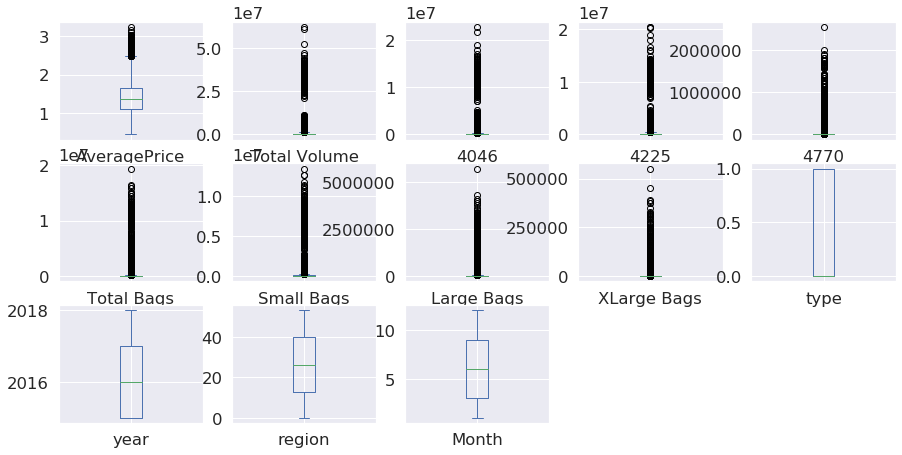

In [41]:
#plotting the boxplot for each column in order to check the outliers 
df.plot(kind='box',subplots = True,layout=(4,5),figsize = (15,10))

As we can foreseen, our data has various columns with outliers!

In [42]:
#plot the whole data
#import seaborn as sns
#sns.pairplot(df)

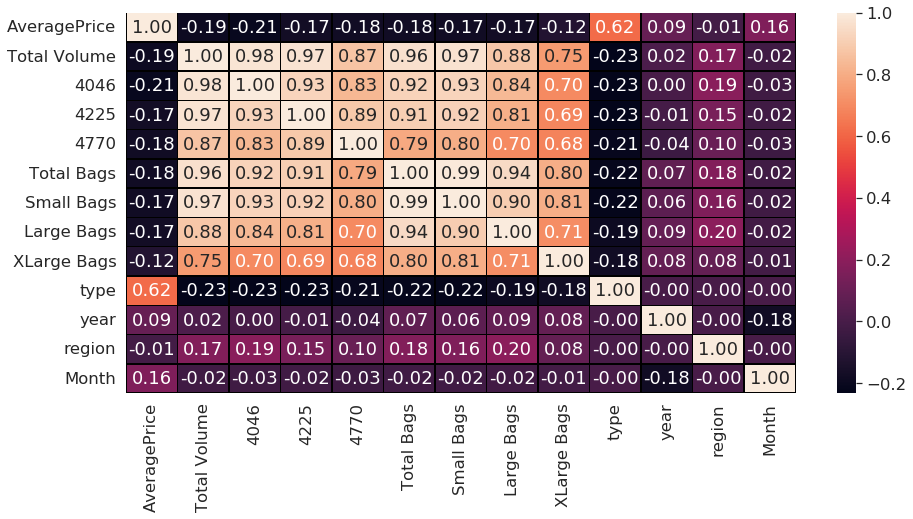

In [43]:
#Now lets have an idea about the relationship between our Features(Correlation)
#Correlation using heatmap: 

import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt='.2f')
#Correlation summarizes the strength and direction of the linear (straight-line) association between two quantitative variables

As we can from the heatmap above, almost all the Features are not highly correleted with the Average Price column. Instead, if we check and notice the orange color shades in our above histogram, we can notice most of the features are correlated with each other. 

With regards the target Average Price, we can see that most of the features are negative correlated which means has negative impact on the target. But only features type, year and Month have positive correlation with regards the target Average Price.

With regard the variable Region, mostly all the features are correlated positively with it except Average Price. We can see negative impact of type, year and month, but the impact almost 0.

In [44]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int64
year              int64
region            int64
Month             int64
dtype: object

In [45]:
df['type'].unique()

array([0, 1])

In [46]:
df['type'].nunique()

2

In [47]:
df['region'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

In [48]:

df['region'].nunique()

54

As we can see we have 54 regions and 2 unique types, so it's going to be easy to to transform the type feature to dummies, but for the region its going to be a bit complex, so I will keep label encoded.

I will drop the Date Feature as well because I already have 3 other columns for the Year, Month and Day.

In [49]:
df.drop(['Date'],inplace=True,axis=1)

In [50]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1


In [51]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int64
year              int64
region            int64
Month             int64
dtype: object

In [52]:
#Checking the outliers and removing them:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(18249, 13)

In [53]:
threhold=3
print(np.where(z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428]), array([2, 2, 8, ..., 0, 0, 0]))


So, I first find the zscore value and then I decide to make one threshold value as 3 which is standard of industry recommend value and then I remove all the outliers which zscore value is greater than 3.

In [54]:
#checking the dataset shape (with outliers and with outliers)
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(18249, 13)
(17651, 13)


After, removing the outlier’s final there are 17651 and 13 column presents in the data set.

In [55]:
df_new.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month'],
      dtype='object')

In [56]:
#Percentage of data loss:
loss_perc=(18249-17651)/18249*100
loss_perc #since the loss < 10%, so we can proceed with removing the outliers.

3.276891884486821

In [57]:
df_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1


In [58]:
#checking the value counts of each region
df.region.value_counts()

0     338
40    338
29    338
30    338
31    338
32    338
33    338
34    338
35    338
36    338
37    338
38    338
39    338
41    338
1     338
42    338
43    338
44    338
45    338
46    338
47    338
48    338
49    338
50    338
51    338
52    338
28    338
27    338
26    338
25    338
2     338
3     338
4     338
5     338
6     338
7     338
8     338
9     338
10    338
11    338
12    338
13    338
14    338
15    338
16    338
17    338
18    338
19    338
20    338
21    338
22    338
23    338
24    338
53    335
Name: region, dtype: int64

In [59]:
#chekcing skewness
df_new.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
Month           0.107408
dtype: float64

In [60]:
#making the skew less than or equal to 0.55 for better prediction and plotting Normal distribution
skew=('Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags')
for col in skew :
    if df_new.skew().loc[col]>0.55:
        df_new[col] = np.log1p(df_new[col])

In [61]:
#skewness of modified dataframe
df_new.skew()

AveragePrice    0.377432
Total Volume   -0.049950
4046           -0.420273
4225           -0.604619
4770            0.068532
Total Bags     -0.384493
Small Bags     -0.788988
Large Bags     -0.610874
XLarge Bags     1.216238
type           -0.037741
year            0.229976
region          0.012798
Month           0.107408
dtype: float64

 Now the skewness value of each column is near to zero. Making the skewness value near to zero will help to get better score.


Now we can start modeling and first start with the Linear Regression because our Target variable 'AveragePrice'is continuous. 

Let's split and train our regression model and then test it.

In [62]:
x = df_new.drop(columns=['AveragePrice'])
y = df_new[["AveragePrice"]]
print(x.shape)
print(y.shape)

#Above we are using AveragePrice as output variable as it is our target value and that's the value we need to predict with our best algorithm!

(17651, 12)
(17651, 1)


In [63]:
#Standardize the value of x so which will convert the mean around 0 and SD will become 1 , and make the data normally distributed
sc = StandardScaler()
sc.fit_transform(x)
x = pd.DataFrame(x,columns=x.columns)

Creating and Training the Model

In [64]:
X=df_new.iloc[:,1:14]
y=df_new['AveragePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#Creating and Training the Model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
from sklearn import metrics
r2_sc = r2_score(y_test,pred)
print("R2 Score :",r2_sc*100)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 Score : 55.56472652587454
MAE: 0.20235784455143582
MSE: 0.06563783605256915
RMSE: 0.2561988213332941


The RMSE is low so we can say that we do have a good model, but lets check to be more sure.
Lets plot the y_test vs the predictions

Text(0, 0.5, 'Predicted Y')

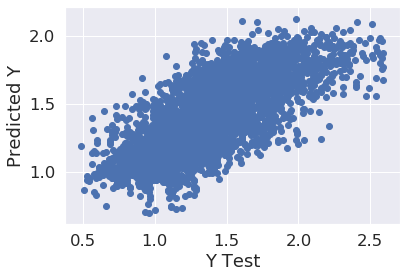

In [65]:
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

As our errors like RMSE are still a bit high, so we have such dispersion in our previous plot let's check another model!

Text(0, 0.5, 'Predicted Y')

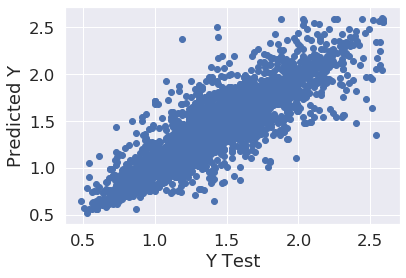

In [66]:
#let's try DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Nice, here we can see that we nearly have a straight line, in other words its better than the Linear regression model, and to be more sure lets check some metrics like RMSE

In [67]:
#printing the error metrics:
r2_sc = r2_score(y_test,pred)
print("R2 Score :",r2_sc*100)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 Score : 76.979040719721
MAE: 0.12158028887000848
MSE: 0.03400555083545738
RMSE: 0.18440594034753158


Very Nice, we have higher accuracy and our RMSE is lower than the previous one we got with Linear Regression. Now I am going to try one last model to see if I can improve my predictions for this data which is the RandomForestRegressor

In [68]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)
r2_sc = r2_score(y_test,pred)
print("R2 Score :",r2_sc*100)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 Score : 87.65025794623942
MAE: 0.09513990370999716
MSE: 0.018242497026338147
RMSE: 0.13506478825488955


Well, great! we have just improved our results and we we have now accuracy of 87,31%. as we can see the RMSE is lower than the two previous models, so the RandomForest Regressor is the best model in this case.


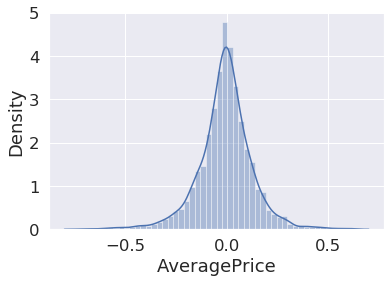

In [69]:
#residuals
sns.distplot((y_test-pred),bins=50)

Our residuals are normally distributed and that's really a good sign of our model!

,Y_Test,Pred
3596,1.36,1.397
7141,1.70,1.569
4625,1.22,1.168
5456,0.81,0.876
10969,1.85,1.884


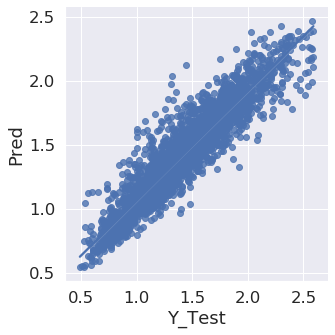

In [70]:
#Lets see final Actual Vs Predicted sample.

data = pd.DataFrame({'Y_Test':y_test , 'Pred':pred},columns=['Y_Test','Pred'])
sns.lmplot(x='Y_Test',y='Pred',data=data,palette='rainbow')
data.head()


All seems fine! But, let look for a better model!

In [71]:
#Now by using multiple Algorithms we are calculating the best Algo which suit best for our data set and let's see if we get an improvement on our modeling score:

model = [DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),GradientBoostingRegressor()]
max_r2_score = 0
for r_state in range(50,89):
    train_x,test_x,train_y,test_y = train_test_split(X,y,random_state = r_state,test_size = 0.33)
    for i in model:
        i.fit(train_x,train_y)
        pre = i.predict(test_x)
        r2_sc = r2_score(test_y,pre)
        print("R2 score correspond to random state " ,r_state ,"is", r2_sc)
        if r2_sc> max_r2_score:
            max_r2_score=r2_sc
            final_state = r_state
            final_model = i
            
print()
print()
print()
print()
print("max R2 score correspond to random state " ,final_state , "is" , max_r2_score ,"and model is",final_model)
#Above I am using the for loop which help me to provide the R2 score at each random state and for the best state where R2 score is maximum is come as output value.

R2 score correspond to random state  50 is 0.7330954927956559
R2 score correspond to random state  50 is 0.8357639298192243
R2 score correspond to random state  50 is 0.5629730114942738
R2 score correspond to random state  50 is 0.5517583536847289
R2 score correspond to random state  50 is 0.7410385745842192
R2 score correspond to random state  51 is 0.7527835474662208
R2 score correspond to random state  51 is 0.8327590988748592
R2 score correspond to random state  51 is 0.5447358439417317
R2 score correspond to random state  51 is 0.5507938860945847
R2 score correspond to random state  51 is 0.7412855816026849
R2 score correspond to random state  52 is 0.7227293205059413
R2 score correspond to random state  52 is 0.8244129981869663
R2 score correspond to random state  52 is 0.5679812544464141
R2 score correspond to random state  52 is 0.5571536104585024
R2 score correspond to random state  52 is 0.7429165744793107
R2 score correspond to random state  53 is 0.7399484891627199
R2 score

In [72]:
#checking the R2_score given the best paramters
KNN = KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30,metric='minkowski' , metric_params=None, n_jobs=None,  p=2)
KNN.fit(train_x,train_y)
pred = KNN.predict(test_x)
r2_sc = r2_score(test_y,pred)
print("R2 Score :",r2_sc*100)

R2 Score : 84.30188406425262


In [73]:
#checking the errors metrics
print('MAE:', metrics.mean_absolute_error(test_y, pred))
print('MSE:', metrics.mean_squared_error(test_y, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, pred)))

MAE: 0.11167347639484977
MSE: 0.02379530643776824
RMSE: 0.15425727353278432


In [74]:
#Checking the best parameter for prediction of KNeighborsRegressor AlgoRITHM using GridSearchCV with the parameters given that random state is 88. Let's tune and try to get best parameters when random state is 88:
train_x,test_x,train_y,test_y = train_test_split(X,y,random_state = 88,test_size = 0.33)
KN = KNeighborsRegressor()
parameters={'n_neighbors' : range(1,6), 'p': (1,3), 'weights':('uniform','distance')}
gridsearch=GridSearchCV(KN,parameters)
gridsearch.fit(train_x,train_y)
gridsearch.best_params_

{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

In [75]:
#checking the mean errors given the best parameters {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
print('Mean Absolute Error: ', mean_absolute_error(test_y,pred))
print('Mean squared Error: ', mean_squared_error(test_y,pred))
print('Root Mean Absolute Error: ', np.sqrt(mean_absolute_error(test_y,pred)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, pred)))

Mean Absolute Error:  0.11167347639484977
Mean squared Error:  0.02379530643776824
Root Mean Absolute Error:  0.33417581659187995
RMSE: 0.15425727353278432


In [76]:
#checking the R2_score {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
KNN = KNeighborsRegressor(n_neighbors=3, weights='distance', algorithm='auto', leaf_size=30,metric='minkowski' , metric_params=None, n_jobs=None,  p=1)
KNN.fit(train_x,train_y)
pred = KNN.predict(test_x)
r2_sc = r2_score(test_y,pred)
print("R2 Score :",r2_sc*100)

R2 Score : 89.5779821883783


In [77]:
#error results having {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
print('MAE:', metrics.mean_absolute_error(test_y, pred))
print('MSE:', metrics.mean_squared_error(test_y, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, pred)))

MAE: 0.08708389711313454
MSE: 0.015797762517646363
RMSE: 0.12568915035772324


In [78]:
#Checking the best parameter for prediction of KNeighborsRegressor AlgoRITHM using GridSearchCV with the parameters given above
train_x,test_x,train_y,test_y = train_test_split(X,y,random_state = 85,test_size = 0.33)
KN = KNeighborsRegressor()
parameters={'n_neighbors' : range(1,6), 'p': (1,3), 'weights':('uniform','distance')}
gridsearch=GridSearchCV(KN,parameters)
gridsearch.fit(train_x,train_y)
gridsearch.best_params_

{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

In [79]:
#checking the R2_score given only parameters {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
KNN = KNeighborsRegressor(n_neighbors=3, p=1, weights='distance' )
KNN.fit(train_x,train_y)
pred = KNN.predict(test_x)
r2_sc = r2_score(test_y,pred)
print("R2 Score :",r2_sc*100)

R2 Score : 89.23146291887535


In [80]:
#checking the mean errors after trained the model only with parameters {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
print('Mean Absolute Error: ', mean_absolute_error(test_y,pred))
print('Mean squared Error: ', mean_squared_error(test_y,pred))
print('Root Mean Absolute Error: ', np.sqrt(mean_absolute_error(test_y,pred)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, pred)))

Mean Absolute Error:  0.08925873094810456
Mean squared Error:  0.01672550016177046
Root Mean Absolute Error:  0.29876199716179525
RMSE: 0.129327105286442


,Y_Test,Pred
16593,1.47,1.454350
8606,1.03,1.022104
16191,1.35,1.447853
12517,1.42,1.303270
1275,0.96,1.168583


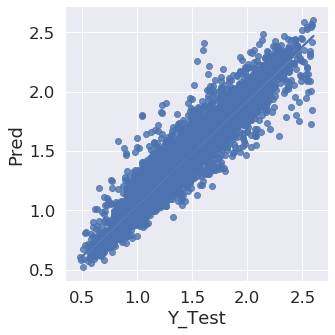

In [81]:
#let's plot it:
data = pd.DataFrame({'Y_Test':test_y , 'Pred':pred},columns=['Y_Test','Pred'])
sns.lmplot(x='Y_Test',y='Pred',data=data,palette='rainbow')
data.head()

Till now, if we check all the accuracy scores and also the errors metrics till now, we will see the model is KNN with R2 Score of 89.578% and RMSE of 0.12568915, the best one in all our analisis.
So, our final model for Avocado average price prediction is KNN. Therefore, we will save this KNN model as our Avocado Average Price Prediction!

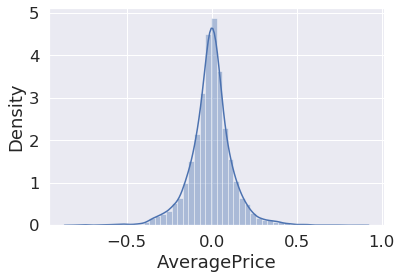

In [82]:
sns.distplot((test_y-pred),bins=50)
#Notice here that our residuals looked to be normally distributed and that's really a good sign which means that our model was a correct choice for the data.

Residuals are normalized, which means our model should work fine for prediction!

The KNN accuracy is high till now and RMSE is the lowest as of now. So we can say that we do have a good model, but lets check to be more sure. Lets plot the y_test vs the predictions


Text(0, 0.5, 'Predicted_Y')

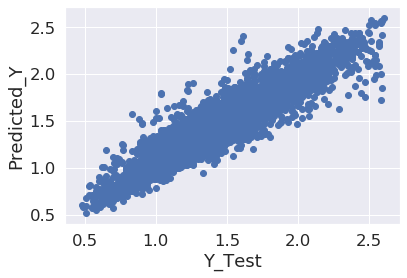

In [83]:
#checking the diff between actual and predicted value using graph_justt to double check
plt.scatter(x=test_y,y=pred)
plt.xlabel('Y_Test')
plt.ylabel('Predicted_Y')

So, as we mentioned earlier, the plotting of the KNN prediction also looks fine. 

As we can see that we have a straight line so I am  sure that this KNN model is the best model we can apply on our data as the graph line is predicting near to the actual data points.

And furthermore, RMSE error is very less compared to others.


In [84]:
#Lets try with the DecisionTree Regressor model
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)
r2_sc = r2_score(y_test,pred)
print("R2 Score :",r2_sc*100)

R2 Score : 76.5124043167792


Text(0, 0.5, 'Predicted Y')

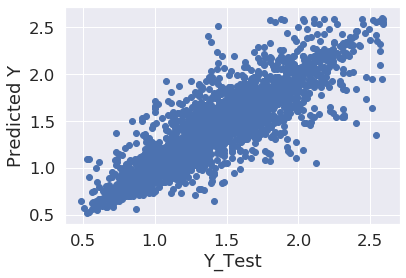

In [85]:
#plotting the scatter plot for predicted Y and Ytest
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y_Test')
plt.ylabel('Predicted Y')

In [86]:
print("R2 Score :",r2_sc*100)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 Score : 76.5124043167792
MAE: 0.12206457094307561
MSE: 0.034694845652789574
RMSE: 0.18626552459537318


As we can see that we don't have a straight line as we have high dispersion in the data. So this is not the best model we can apply on our data. So we will still keep the previous model KNN model.

We see kNeighboour still has the lower RMSE. Ok, now I am going to try one last model to see if I can improve my predictions for this data which is the RandomForestRegressor:

In [87]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(train_x,train_y)
pred=rdr.predict(test_x)

In [88]:
print("R2 Score :",r2_sc*100)
print('MAE:', metrics.mean_absolute_error(test_y, pred))
print('MSE:', metrics.mean_squared_error(test_y, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, pred)))

R2 Score : 76.5124043167792
MAE: 0.10359021459227467
MSE: 0.02123809356223176
RMSE: 0.14573295290438523


OK! As we can see the RMSE is higher than the the KNN model and R2 Score is less than KNN model , so the RandomForest Regressor has not improved our best model KNN results in this case. 

So, finally, our final decision is to go for the KNN model as it has best accuracy, R2_score and the lowest errors compared to others model. 

Final Decision for model selection: KNN model for average price !

In [89]:
#Now we will look for a classification algorithm that works best in classifying the region. For that we will use several classifiers at the same time and check which one works the best!

#importing library for classification algorithms, prediction and matrices:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [90]:
#assign the value of x and y for training and testing phase
x_c = df_new.drop(columns=['region'])
y_c = df_new[["region"]]
print(x_c.shape)
print(y_c.shape)

(17651, 12)
(17651, 1)


In [91]:
#Standardize the value of x so that mean will 0 and SD will become 1 , and make the data as normal distributed
sc = StandardScaler()
sc.fit_transform(x_c)
x_c = pd.DataFrame(x_c,columns=x_c.columns)

In [92]:
train_xc,test_xc,train_yc,test_yc = train_test_split(x_c,y_c,random_state = 62,test_size = 0.33)

In [93]:
#Now by using multiple Algorithms we are checking for the best algorithm which suits best for our data set 

model = [DecisionTreeClassifier(),KNeighborsClassifier(),LogisticRegression(),MultinomialNB(),SVC(),AdaBoostClassifier(),GradientBoostingClassifier()]
max_accuracy_score = 0
for r_state in range(59,67):
    train_xc,test_xc,train_yc,test_yc = train_test_split(x_c,y_c,random_state = r_state,test_size = 0.33)
    for i_c in model:
        i_c.fit(train_xc,train_yc)
        pre_c = i_c.predict(test_xc)
        ac_score = accuracy_score(test_yc,pre_c)
        print("accuracy score correspond to random state " ,r_state ,"is", ac_score)
        if ac_score> max_accuracy_score:
            max_accuracy_score=ac_score
            final_state = r_state
            final_model = i_c
            
print()
print()
print()
print()

print("max accuracy score correspond to random state " ,final_state , "is" , max_accuracy_score ,"and model is",final_model)

accuracy score correspond to random state  59 is 0.7878111587982832
accuracy score correspond to random state  59 is 0.792274678111588
accuracy score correspond to random state  59 is 0.41064377682403436
accuracy score correspond to random state  59 is 0.04738197424892704
accuracy score correspond to random state  59 is 0.8508154506437768
accuracy score correspond to random state  59 is 0.07690987124463519
accuracy score correspond to random state  59 is 0.8321030042918455
accuracy score correspond to random state  60 is 0.7888412017167382
accuracy score correspond to random state  60 is 0.7902145922746782
accuracy score correspond to random state  60 is 0.415793991416309
accuracy score correspond to random state  60 is 0.04017167381974249
accuracy score correspond to random state  60 is 0.8499570815450643
accuracy score correspond to random state  60 is 0.055793991416309016
accuracy score correspond to random state  60 is 0.8271244635193133
accuracy score correspond to random state  6

In [94]:
#checking score of SVC with none random state
SVC_model = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

SVC_model.fit(train_xc,train_yc)
predc = SVC_model.predict(test_xc)
acu_score = accuracy_score(test_yc,predc)
print("Accuracy Score :",acu_score*100)
SVC_model.score(test_xc, test_yc) #best_one_for_modeling and training

Accuracy Score : 85.88841201716738


0.8588841201716738

In [95]:
#checking score of SVC with random state 66
SVC_model2 = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=66,
    shrinking=True, tol=0.001, verbose=False)

SVC_model2.fit(train_xc,train_yc)
predc = SVC_model2.predict(test_xc)
acu_score = accuracy_score(test_yc,predc)
print("Accuracy Score :",acu_score*100)
SVC_model2.score(test_xc, test_yc) #best_one

Accuracy Score : 85.88841201716738


0.8588841201716738

In [96]:
accuracy = accuracy_score(test_yc,predc)
print('Accuracy of the best classifier after CV is %.2f%%' % (accuracy*100))

Accuracy of the best classifier after CV is 85.89%


In [97]:
#Let's try once again with AdaboostClassifier just to check if we previously got the best accuracy when comparing all the classifiers at once:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier


clf = AdaBoostClassifier(n_estimators=100)
clf.fit(train_xc,train_yc)
scores = cross_val_score(clf, train_xc, train_yc, cv=5)
scores=scores.mean()
print("Accuracy Score :",scores*100)
clf.score(test_xc, test_yc)

Accuracy Score : 5.929100346348491


0.05802575107296137

In [98]:
#checking score of GBC
clf = GradientBoostingClassifier(criterion='friedman_mse',loss='deviance',n_estimators=100, learning_rate=0.1,
     max_depth=3, random_state=0).fit(train_xc, train_yc)
sc=clf.score(test_xc, test_yc)
print("Accuracy Score :",sc*100)
scores = cross_val_score(clf, train_xc, train_yc, cv=5)
scores

Accuracy Score : 83.2618025751073


array([0.80637049, 0.79587542, 0.82974229, 0.81409168, 0.81204613])

In [99]:
#Checking the best parameter for prediction of KNeighborsClassifier Algo using GridSearchCV
KNC = KNeighborsClassifier()
parameters={'n_neighbors' : range(1,30), 'weights': ('uniform', 'distance') }
gridsearch=GridSearchCV(KNC,parameters)
gridsearch.fit(train_xc,train_yc)
gridsearch.best_params_
gridsearch.score(test_xc, test_yc)

0.8461802575107296

So far, the best accuracy for cassification is 85.89%

Conclusion 

Final model: Through the use of many different classification models, and tuning the best performing, my final model which is SVC, through which we have obtained an accuracy of 85.89%. 

Now that we have a proper model, we can start evaluating it’s performace in a more accurate way.

For further Evaluation, let's print confusion matrix:

In [100]:

#Confusion Matrix:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(SVC_model, train_xc, train_yc, cv=3)
confusion_matrix(train_yc, predictions)


array([[217,   0,   0, ...,   0,   0,   0],
       [  0, 147,   0, ...,   0,   0,   1],
       [  0,   0, 224, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 114,   0,   0],
       [  0,   0,   0, ...,   0, 149,   0],
       [  0,   1,   6, ...,   0,   0, 144]])

In [122]:
#Precision and Recall:

print("Precision Score : ",precision_score(train_yc, predictions, 
                                           pos_label='positive',
                                           average='micro'))
print("Recall Score : ",recall_score(train_yc, predictions, 
                                           pos_label='positive',
                                           average='micro'))

Precision Score :  0.8079654997463217
Recall Score :  0.8079654997463217


Our model predicts 80.8% of the time the right region. The recall tells us that it predicted that region 80,79 % of the avocados who actually are from the predicted region.

F-Score You can combine precision and recall into one score, which is called the F-score. The F-score is computed with the harmonic mean of precision and recall. Note that it assigns much more weight to low values. As a result of that, the classifier will only get a high F-score, if both recall and precision are high.

In [123]:

from sklearn.metrics import f1_score
f1_score(train_yc, predictions,average='micro' )

0.8079654997463217

That's a good f1_score

In [129]:
import pickle
filename='Avocado_region_clf.pkl'
pickle.dump(SVC_model,open(filename,'wb'))

In [131]:
#Conslusion
import pickle
loaded_model=pickle.load(open('Avocado_region_clf.pkl','rb'))
result=loaded_model.score(test_xc,test_yc)
print(result)

0.8588841201716738


In [132]:
Conclusion=pd.DataFrame([loaded_model.predict(test_xc)[:],predc[:]],index=["Predicted","Original"])
Conclusion

,0,1,2,3,4,5,6,7,8,9,...,5815,5816,5817,5818,5819,5820,5821,5822,5823,5824
Predicted,7,49,12,1,46,3,16,53,39,19,...,27,34,7,41,41,23,48,11,15,3
Original,7,49,12,1,46,3,16,53,39,19,...,27,34,7,41,41,23,48,11,15,3


In [133]:
#save the model 
import pickle
filename='Avocado_Aaverage_Price.pkl'
pickle.dump(KNN,open(filename,'wb'))

In [136]:
#Conslusion
import pickle
loaded_model=pickle.load(open('Avocado_Aaverage_Price.pkl','rb'))
result_v2=loaded_model.score(test_x,test_y)
print("Accuracy Score :",result_v2*100)

Accuracy Score : 89.23146291887535


In [137]:
Conclusion=pd.DataFrame([loaded_model.predict(test_xc)[:],predc[:]],index=["Predicted","Original"])
Conclusion

,0,1,2,3,4,5,6,7,8,9,...,5815,5816,5817,5818,5819,5820,5821,5822,5823,5824
Predicted,1.53998,2.003371,1.606692,0.993334,0.806668,1.533326,0.869972,0.826669,0.916681,1.360002,...,0.993333,1.839978,0.966674,0.746666,1.249982,0.873375,0.840039,1.336663,0.989989,1.749996
Original,7.00000,49.000000,12.000000,1.000000,46.000000,3.000000,16.000000,53.000000,39.000000,19.000000,...,27.000000,34.000000,7.000000,41.000000,41.000000,23.000000,48.000000,11.000000,15.000000,3.000000


In [ ]:
#DOne!